In [1]:
#check for data file
import os

In [2]:
print(os.listdir())

['.ipynb_checkpoints', '911.csv', 'Analysis on 911 Dataset.ipynb']


In [3]:
# importing all major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# usage of inline plotting
%matplotlib inline

In [4]:
# load data from CSV file
dataFrame = pd.read_csv('911.csv')

In [5]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
lat          289240 non-null float64
lng          289240 non-null float64
desc         289240 non-null object
zip          253942 non-null float64
title        289240 non-null object
timeStamp    289240 non-null object
twp          289137 non-null object
addr         289240 non-null object
e            289240 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [6]:
# checking head for our dataframe
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
#top5 zipcodes
dataFrame['zip'].value_counts().head(5)

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: zip, dtype: int64

In [8]:
#top5 townships reaching to 911
dataFrame['twp'].value_counts().head(5)

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
Name: twp, dtype: int64

In [9]:
#unique reason to 911
dataFrame['title'].nunique()

131

In [10]:
# top5 specific reasons to call 911

dataFrame['SpecificReason'] = dataFrame['title'].apply(lambda title: title.split(':')[1])

In [11]:
dataFrame.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY


In [12]:
dataFrame['SpecificReason'].value_counts().head(5)

 VEHICLE ACCIDENT -       68123
 DISABLED VEHICLE -       20667
 VEHICLE ACCIDENT         16747
 FIRE ALARM               16359
 RESPIRATORY EMERGENCY    14637
Name: SpecificReason, dtype: int64

In [13]:
# top5 broad reasons to call 911

dataFrame['BroadReason'] = dataFrame['title'].apply(lambda title: title.split(':')[0])

In [14]:
dataFrame['BroadReason'].value_counts()

EMS        144362
Traffic    101889
Fire        42989
Name: BroadReason, dtype: int64

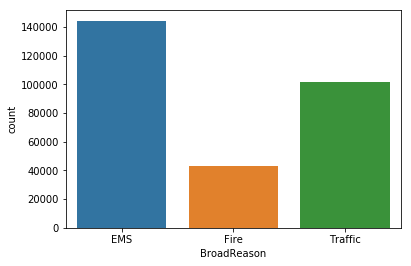

In [15]:
# plotting countplot for BroadReason

sns.countplot(x = 'BroadReason', data = dataFrame)

In [16]:
# convert timestamp to actal timestamp

dataFrame['timeStamp'] = pd.to_datetime(dataFrame['timeStamp'])

In [17]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 11 columns):
lat               289240 non-null float64
lng               289240 non-null float64
desc              289240 non-null object
zip               253942 non-null float64
title             289240 non-null object
timeStamp         289240 non-null datetime64[ns]
twp               289137 non-null object
addr              289240 non-null object
e                 289240 non-null int64
SpecificReason    289240 non-null object
BroadReason       289240 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 24.3+ MB


In [18]:
type(dataFrame['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
# create three columns for Hour, Months and Day of week

dataFrame['Hour'] = dataFrame['timeStamp'].apply(lambda time: time.hour)
dataFrame['Month'] = dataFrame['timeStamp'].apply(lambda time: time.month)
dataFrame['Day'] = dataFrame['timeStamp'].apply(lambda time: time.day)
dataFrame['DayofWeek'] = dataFrame['timeStamp'].apply(lambda time: time.dayofweek)

In [20]:
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason,BroadReason,Hour,Month,Day,DayofWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,12,10,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17,12,10,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,14,12,10,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,16,12,10,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS,16,12,10,3


In [21]:
dataFrame['DayofWeek'].nunique()
dataFrame['Day'].nunique()

31

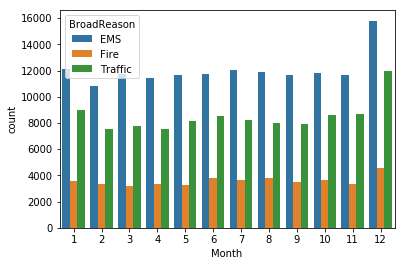

In [22]:
# plot a graph for Month

sns.countplot(x = 'Month', data = dataFrame, hue = 'BroadReason')

In [23]:
# using groupby

byMonth = dataFrame.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason,BroadReason,Hour,Day,DayofWeek
Month,,,,,,,,,,,,,,
1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,24701,24701,24701
2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663,21663,21663,21663
3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743,22743,22743,22743
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093,23093,23093


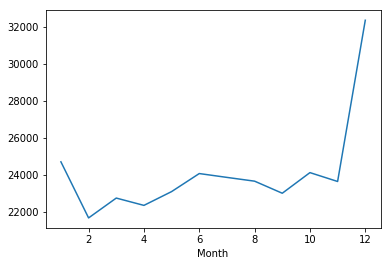

In [24]:
byMonth['twp'].plot()

In [25]:
dataFrame.corr(method='kendall')

,lat,lng,zip,e,Hour,Month,Day,DayofWeek
lat,1.000000,-0.286100,0.261734,NaN,-0.003586,-0.005383,0.001152,0.005486
lng,-0.286100,1.000000,-0.412523,NaN,-0.000875,0.004569,0.000084,-0.014349
zip,0.261734,-0.412523,1.000000,NaN,0.001437,-0.003262,0.001228,0.007509
e,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Hour,-0.003586,-0.000875,0.001437,NaN,1.000000,0.006848,0.002150,0.009945
Month,-0.005383,0.004569,-0.003262,NaN,0.006848,1.000000,0.020599,0.004096
Day,0.001152,0.000084,0.001228,NaN,0.002150,0.020599,1.000000,-0.004244
DayofWeek,0.005486,-0.014349,0.007509,NaN,0.009945,0.004096,-0.004244,1.000000


In [ ]:
dataFrame.skew()

lat          -6.666383
lng         -10.468228
zip          26.608302
e             0.000000
Hour         -0.324895
Month        -0.051382
Day          -0.032754
DayofWeek     0.057449
dtype: float64